# Project 2 : Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p style="text-align:left;"> <b>
The Medical Appointment No Shows dataset collects information
from 110.527 medical appointments in Brazil. The most important issue of whether if the patient show-up or no-show to the appointment. 
There are 14 variables (characteristics) about the patient that are included in each row in the dataset.
</b> </p>
<ol>
<li> PatientId : Identification of a patient. <br> </li>
<li>AppointmentID: Identification of each appointment.<br>
<li>Gender: Male or Female. <br>
<li>DataMarcacaoConsulta: The day of the actual appointment.<br>
<li>DataAgendamento: The day of registered the appointment.<br>
<li>Age: of the patient. <br>
<li>Neighbourhood: location of the hospital.<br>
<li>Scholarship (enrollment in Brasilian welfare program Bolsa Família): True or False.<br> 
<li>Hypertension: True or False.<br>
<li>Diabetes: True or False<br>
<li>Alcoholism: True or False<br>
<li>Handicap: True or False<br>
<li>SMS_received: 1 or more messages sent to the patient.<br>
<li>No-show: True (did not show up) or False (the patient showed up).<br>
</ol>

#### The major objective of this study was to investigate he following 3 questions :

<p style="text-align:left;">
<ul>
<li>Is age variances among patients have an impact in their commitment to their appointments?<br>
<li>Are the patient's' gender relate whether or not show up for their appointment? <br>
<li>Are SMS notifications affects the no-shows?<br>    
</ul></p>





### Data and Libraries Loading 

In [232]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plots in the notebook
%matplotlib inline

In [14]:
# load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [43]:
# Return the dimensions of the dataframe
df.shape

(110527, 14)

The ouput shows that there are 14 coulmns and 110527 rows in the dataset.

In [15]:
# Return the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Note 
As noticing above, "scheduled_day" and "appointment_day" columns type should be convert to datetime (probably wouldn't need this step in this investigation).

In [13]:
# Display the first 10 lines in our dataframe 
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [39]:
#Check if columns have missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [54]:
#Return count of missing values
missing_data = df[df.isnull().any(axis=1)]
len(missing_data)

0

#### Note 
The ouput shows that there are no missing values in dataset

In [55]:
#Return count of duplicated rows  
duplicated_data = df[df.duplicated()]
len(duplicated_data)

0

#### Note 
The ouput shows that there are no duplicated rows in dataset

In [23]:
# Return the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Note
"AppontmentID" has 110527 values, thats also indicate to no duplicated rows in dataset.

In [56]:
#Return all statistics about each culomn in dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Note
Focusing on variables that we investigate, we can see the minimum value of "age" is a little bit strange!
Also, We notice that only 32% of overall patient receive SMS.

### Data Cleaning
The output shown before displaied an outlier (-1) in the "Age" column, which could potentially be errors. 

In [69]:
#List unique values in "Age" column
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [72]:
#Return the row with outlier value
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
#Drop the row with age = -1
df.drop(index= 99832, inplace= True)

In [78]:
#check after dropping value "1"
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [114]:
#check after dropping value "2"
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [84]:
#check after dropping value "3"
df.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Note
As shown above, the outlier was removed correctly with no affected on other unique values.

<a id='eda'></a>
## Exploratory Data Analysis



Before going to questions, let me discover the proportion of no-shows in the overall dataset

In [294]:
no_shows_p = df['No-show'].value_counts()

no_shows_p

No     88207
Yes    22319
Name: No-show, dtype: int64

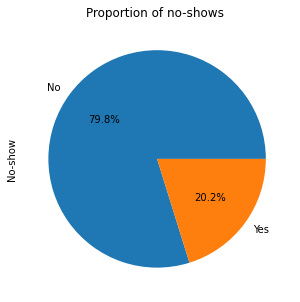

In [360]:
no_shows_p.plot.pie(figsize=(5,5), autopct= '%.1f%%', explode=(0,0))
plt.title('Proportion of no-shows ');

#### Note
As shown above, there are 22319 patient from 110526 are no-shows, which is around 20%.

###  Is age variances among patients have an impact on their commitment to their appointments?

First, let me discover the age distribution for each No-Show conditions

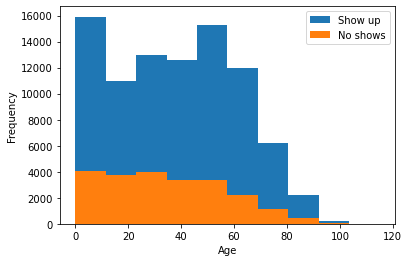

In [362]:
#histogram
show_up  = (df['No-show'] == 'No')
no_shows = (df['No-show'] == 'Yes')

df[show_up].Age.plot.hist()
df[no_shows].Age.plot.hist()

plt.legend(['Show up', 'No shows'])
plt.xlabel('Age');

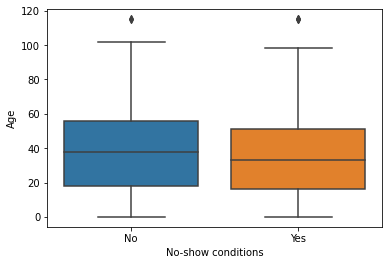

In [361]:
#box plot
sns.boxplot(x=df['No-show'], y=df['Age'])
plt.xlabel('No-show conditions')
plt.ylabel('Age');

In [356]:
print('Show-up Mean Age:{:.2f}'.format(df[show_up].Age.mean()))
print('No-shows Mean Age:{:.2f}'.format(df[no_shows].Age.mean()))

Show-up Mean Age:37.79
No-shows Mean Age:34.32


#### Note
-	From Age 0-10, have more shows up. Perhaps this is due to parents keen in this age period.
-	Also, Age 50-60 has more shows up.
-	The no-show percentage is increasing with age decreasing
-	The average relatively close, but age is slightly lower for No-Shows.


### Are the patient's' gender relate whether or not show up for their appointment?

In [216]:
# Total of female and male patients
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [250]:
Total_M = len((df[(df['Gender'] == 'M')]))
Total_F = len((df[(df['Gender'] == 'F')]))
No_shows_M = len((df[(df['Gender'] == 'M') & (df['No-show'] == 'Yes')]))
No_shows_F = len((df[(df['Gender'] == 'F') & (df['No-show'] == 'Yes')]))    
P_No_shows_M = (No_shows_M / Total_M) * 100
P_No_shows_F = (No_shows_F / Total_F) * 100

print('Total male = ', Total_M)
print('Total female = ',Total_F)
print('No-shows male = ',No_shows_M)
print('No-shows female = ',No_shows_F)
print('Percentage of no-shows male = ', P_No_shows_M, '%')
print('Percentage of no-shows female = ', P_No_shows_F, '%')

Total male =  38687
Total female =  71839
No-shows male =  7725
No-shows female =  14594
Percentage of no-shows male =  19.967947889471915 %
Percentage of no-shows female =  20.314870752655242 %


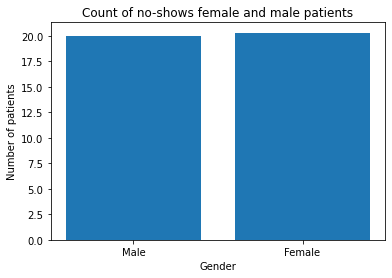

In [251]:
#Plot to display count of no-shows female and male patients
locations = [1, 2]
heights = [P_No_shows_M, P_No_shows_F]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels)
plt.title('Count of no-shows female and male patients')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

#### Note
As shown, 19 % of male appointments are no-shows, and 20 % of female appointments are no-shows! 
They are close values which indicate that "Gender" hasn't impacted the no-shows

### Are SMS notifications affects the no-shows?

In [316]:
SMS_received = len(df[((df['SMS_received'] == 1) & (df['No-show'] == 'Yes'))])
Percentage_of_received = SMS_received/df.query('SMS_received == 1')['SMS_received'].count() * 100

No_SMS_received = len(df[((df['SMS_received'] == 0) & (df['No-show'] == 'Yes'))])
Percentage_of_No_received = SMS_received/df.query('SMS_received == 0')['SMS_received'].count() * 100

print ('From',df['No-show'].count(),'no-shows patients, there are',SMS_received, 'patients received SMS, which approximately', int(Percentage_of_received), '%. And',No_SMS_received,'patients not received SMS, which is', int(Percentage_of_No_received), '%!' )




From 110526 no-shows patients, there are 9784 patients received SMS, which approximately 27 %. And 12535 patients not received SMS, which is 13 %!


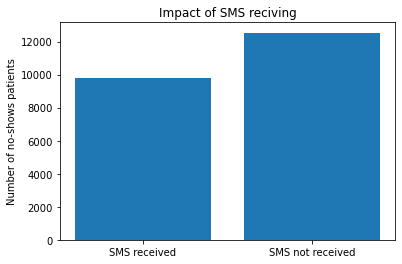

In [322]:
#Plot to display SMS_received affects

locations = [1, 2]
heights = [SMS_received, No_SMS_received]
labels = ['SMS received', 'SMS not received']
plt.bar(locations, heights, tick_label=labels)
plt.title('Impact of SMS reciving')
#plt.xlabel('')
plt.ylabel('Number of no-shows patients');

#### Note
As shown above, SMS receiving negatively affects patients' attendance to their appointments, which is little bit strange!

<a id='conclusions'></a>
## Conclusions
Based on the above analysis we gain the following observations:
- More than three-quarters of the patients show up for appointments.
- The relationship between SMS_received and No-Shows was contrary to what was expected, but I think this is not conclusive evidence that SMS receiving coincide with more no-shows.
- The Age not indicative of whether a patient will show up to their appointments or not. 

In [364]:
# save 
df.to_csv('noshowappointments-kagglev2-may-2016.csv', index=False)

## Referances 
[1] https://www.kaggle.com/joniarroba/noshowappointments/version/4  <br>
[2] https://github.com/cbrands/investigate-a-dataset/blob/master/noshowappointments-kagglev2-may-2016.csv <br>
[3] https://github.com/Abdullatif64/NoShowAppointments-kagglev2-may-2016  <br>
[4] https://github.com/drkkgy/Investigate-a-Dataset-No-Show-Appointment-Data-/blob/master/investigate-a-dataset-template.ipynb
